In [2]:
import pandas as pd
summaries_war3 = pd.read_csv("updated_war_action_movies_with_person_topics.csv")
summaries_war3.dropna(subset=['release_date'], inplace=True)
summaries_war3 = summaries_war3[summaries_war3['country'] == 'United States of America']
summaries_war3.shape

(9782, 11)

In [3]:
# Calculate the amount of data for each topic
topic_counts = summaries_war3['assigned_topic'].value_counts().sort_index()

# Print the amount of data for each topic
print(topic_counts)

assigned_topic
0     204
1     110
2     145
3     118
4      46
     ... 
95    100
96     55
97    126
98    143
99    131
Name: count, Length: 100, dtype: int64


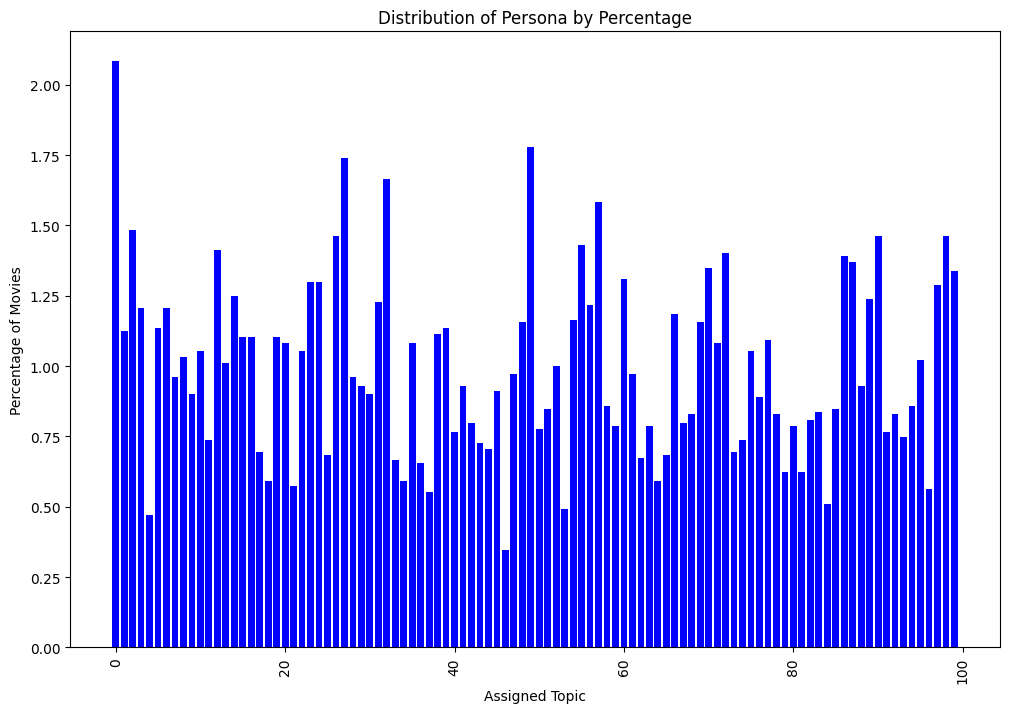

In [4]:
import matplotlib.pyplot as plt

# Calculate the percentage of representation for each topic
topic_percentages = (topic_counts / topic_counts.sum()) * 100

# Plot the distribution of topics as a histogram with percentages
plt.figure(figsize=(12, 8))
plt.bar(topic_percentages.index, topic_percentages.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Percentage of Movies')
plt.title('Distribution of Persona by Percentage')
plt.xticks(rotation=90)
plt.show()

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdown widgets for selecting the start and end topics
start_topic_dropdown = widgets.Dropdown(
    options=[(f'Topic {i}', i) for i in range(100)],
    value=0,
    description='Start Topic:',
)

end_topic_dropdown = widgets.Dropdown(
    options=[(f'Topic {i}', i) for i in range(100)],
    value=99,
    description='End Topic:',
)

# Calculate the topic evolution without normalization
topic_evolution = summaries_war3.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)
# Function to plot the selected range of topics
def plot_topic_evolution(start_topic, end_topic):
    selected_topics = list(range(start_topic, end_topic + 1))
    selected_topic_evolution = topic_evolution[selected_topics]
    
    # Calculate the cumulative sum of the selected topics over time
    cumulative_topic_evolution = selected_topic_evolution.cumsum()
    
    max_appearance = cumulative_topic_evolution.max()
    cumulative_topic_evolution_normalized = cumulative_topic_evolution.div(max_appearance)
    
    # Plot the normalized cumulative sum of the selected topics over time
    cumulative_topic_evolution_normalized.plot(kind='line', figsize=(15, 8))
    plt.title(f'Normalized Cumulative Appearance of Assigned Topics {start_topic} to {end_topic} Over Time')
    plt.xlabel('Release Date')
    plt.ylabel('Normalized Cumulative Proportion of Topics')
    plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Display the dropdowns and plot the selected range of topics
widgets.interactive(plot_topic_evolution, start_topic=start_topic_dropdown, end_topic=end_topic_dropdown)


interactive(children=(Dropdown(description='Start Topic:', options=(('Topic 0', 0), ('Topic 1', 1), ('Topic 2'…

In [6]:

war_action_movies_df = pd.read_csv('war_action_movies.csv')
print(war_action_movies_df.shape)

war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
war_action_movies_df = war_action_movies_df[war_action_movies_df['country'].str.contains('united states of america', case=False, na=False)]


(12160, 8)


C:\Users\valbi\AppData\Local\Temp\ipykernel_13704\2990852354.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [7]:
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
pattern = '|'.join(keywords)
middle_east_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(middle_east_related_movies_df.shape)
middle_east_related_movies_df.head()

(112, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
42,threads,1984.0,NaN,112.45,english,"united states of america, australia, united ki...","doomsday film, nuclear warfare, drama, war fil...",young lovers ruth beckett and jimmy kemp dec...
104,under siege 2: dark territory,1995.0,104324083.0,103.00,english,united states of america,"thriller, action/adventure, action thrillers, ...",casey ryback has retired from the united stat...
237,die another day,2002.0,431900000.0,133.00,"italian , korean , spanish , cantonese, englis...","united states of america, united kingdom","thriller, glamorized spy film, action, adventure",james bond infiltrates a north korean military...
278,the animatrix,2003.0,NaN,69.00,"japanese , english","united states of america, japan","science fiction, japanese movies, adventure, a...",the plot-summaries of the shorts are listed be...
289,three kings,1999.0,107752036.0,112.00,"arabic , english","united states of america, australia","crime fiction, adventure, gulf war, comedy-dra...",the film opens with an iraqi regular army sold...


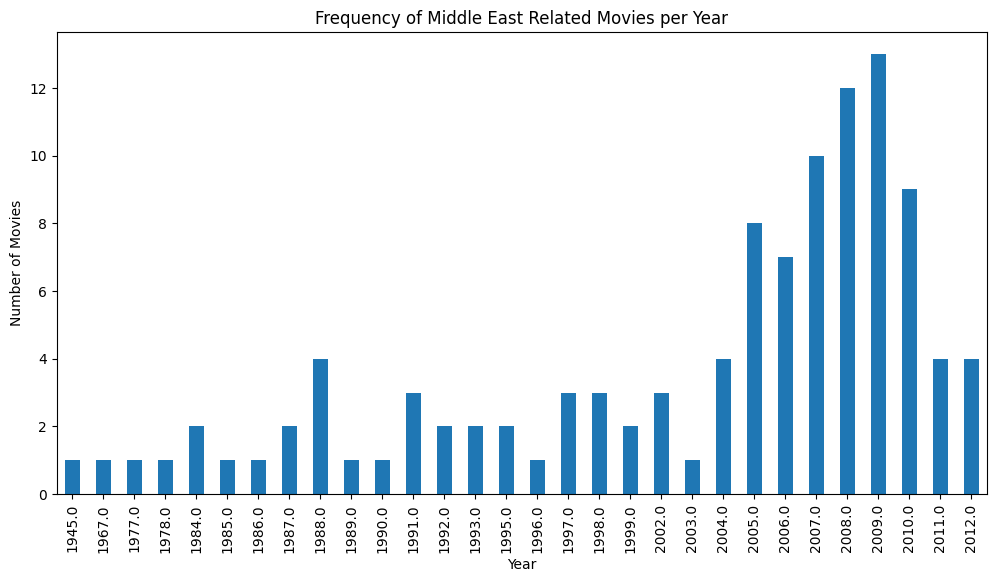

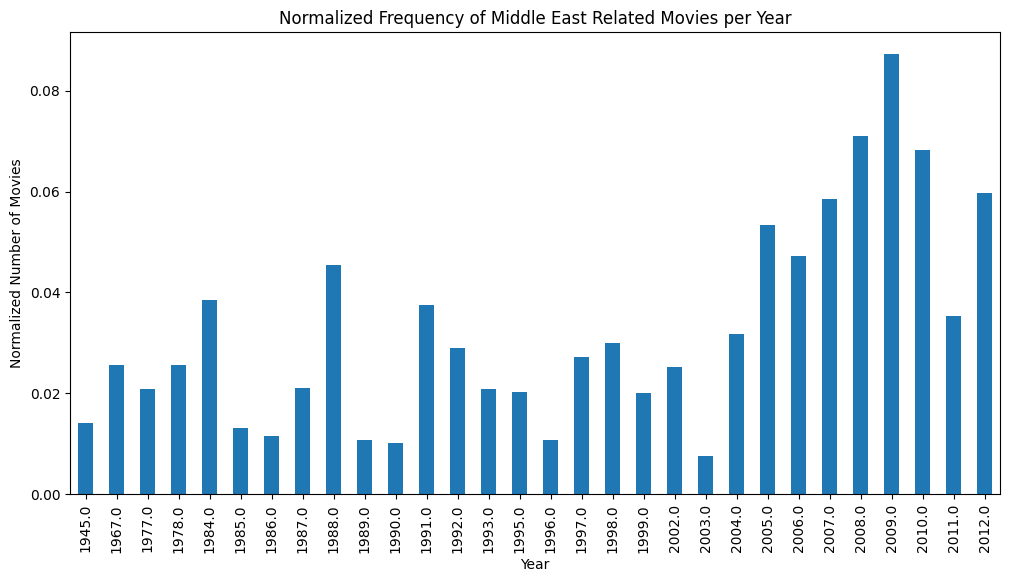

In [8]:
total_movies_per_year = war_action_movies_df['release_date'].value_counts().sort_index()
middle_east_movies_per_year = middle_east_related_movies_df['release_date'].value_counts().sort_index()

normalized_middle_east_movies_per_year = middle_east_movies_per_year / total_movies_per_year


middle_east_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Middle East Related Movies per Year')
plt.show()

normalized_middle_east_movies_per_year = normalized_middle_east_movies_per_year[normalized_middle_east_movies_per_year> 0]
normalized_middle_east_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Middle East Related Movies per Year')
plt.show()

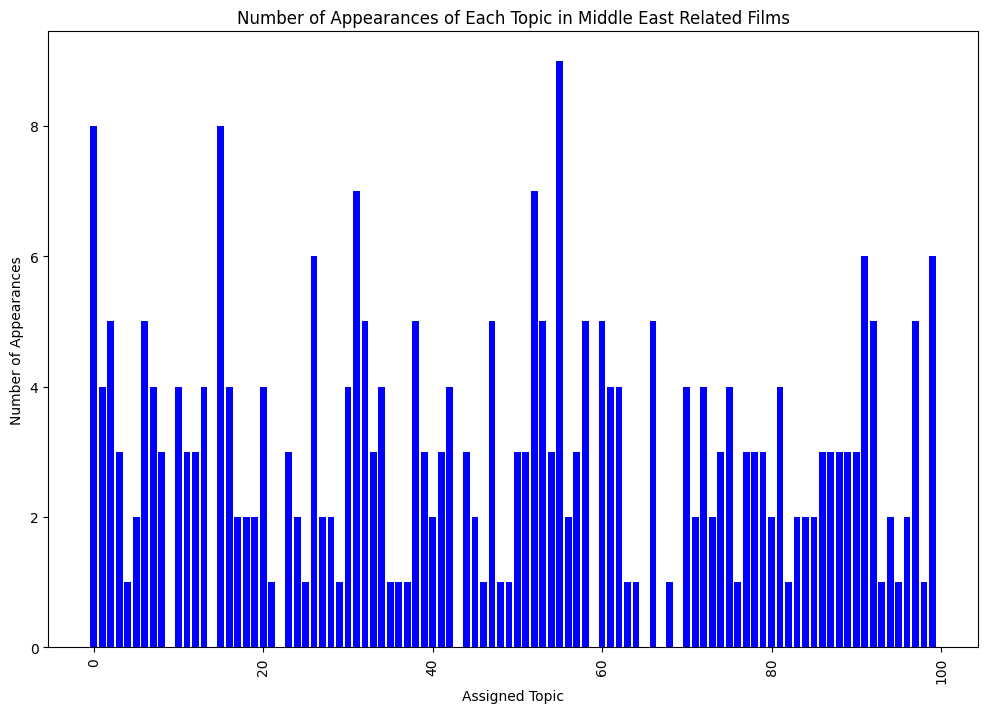

In [9]:
# Filter summaries_war3 to include only the films that are in middle_east_related_movies_df
middle_east_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(middle_east_related_movies_df['name'])]

# Count the number of appearances of each topic in the filtered dataframe
middle_east_topic_counts = middle_east_related_summaries['assigned_topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(middle_east_topic_counts.index, middle_east_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Middle East Related Films')
plt.xticks(rotation=90)
plt.show()

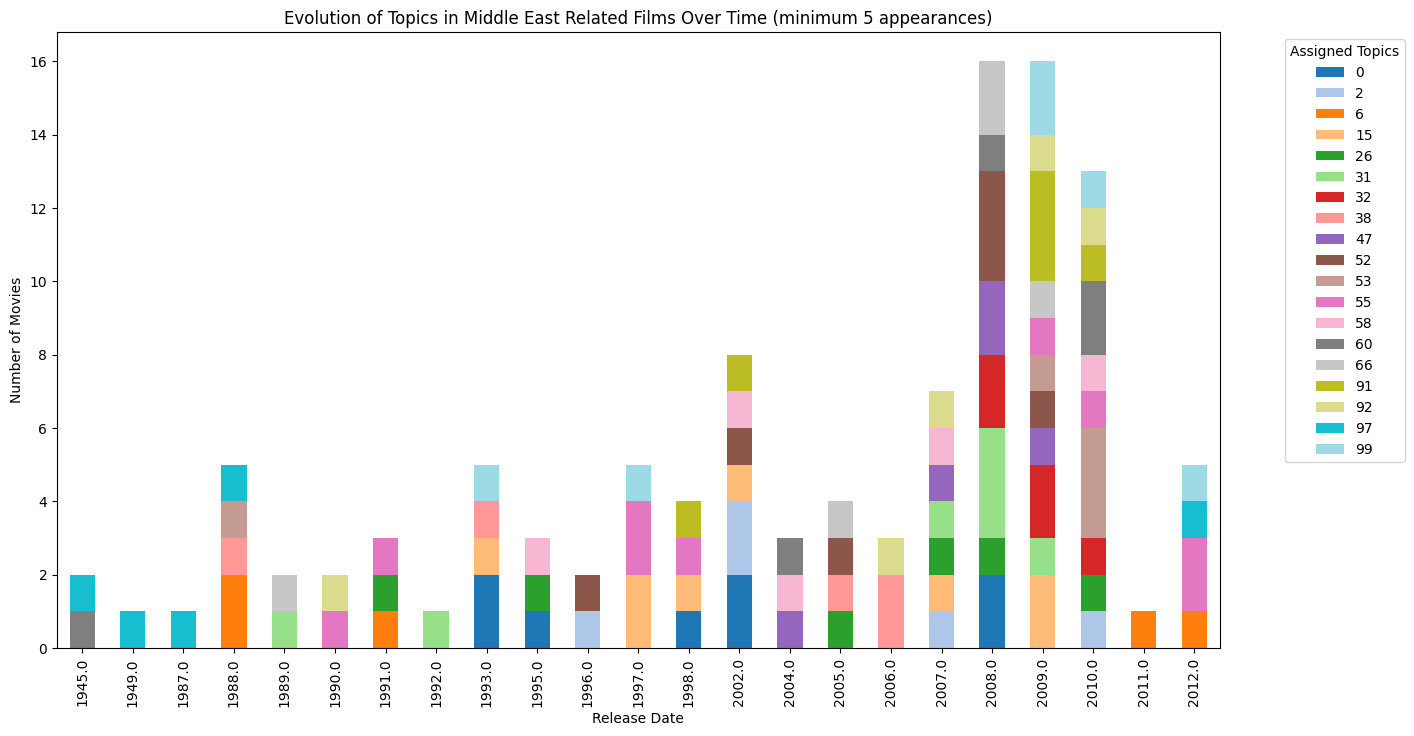

In [30]:
import seaborn as sns

# Set the color palette to a more diverse one
sns.set_palette("tab20")

# Filter topics that appear at least 3 times
filtered_topics = middle_east_topic_counts[middle_east_topic_counts >= 5].index

# Create a pivot table to aggregate the data by release date and assigned topic
filtered_topic_evolution = middle_east_related_summaries[middle_east_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

# Plot the evolution of topics over time as a stacked bar plot
filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Middle East Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [27]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
pattern = '|'.join(keywords)

vietnam_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(vietnam_related_movies_df.shape)
vietnam_related_movies_df.head()

(147, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
17,full metal jacket,1987.0,46300000.0,112.0,"vietnamese , english","united states of america, united kingdom","anti-war, war film, period piece, drama, film ...","in 1967, during the vietnam war, a group of ne..."
48,forrest gump,1994.0,677387716.0,136.0,english,united states of america,"coming of age, comedy film, drama, war film, r...","as he waits at a bus stop, forrest gump star..."
97,above the law,1988.0,18869631.0,99.0,"english , spanish","united states of america, hong kong","thriller, action/adventure, action, martial ar...","sergeant nicolo ""nico"" toscani is a detective..."
169,the karate kid,1984.0,90815558.0,127.0,"japanese , english","united states of america, japan","action/adventure, japanese movies, adventure, ...","daniel larusso , a high school senior, moves w..."
195,coming home,1978.0,32653905.0,126.0,english,united states of america,"drama, war film, romantic drama, romance film,...","in the spring of 1968 in california, sally , a..."


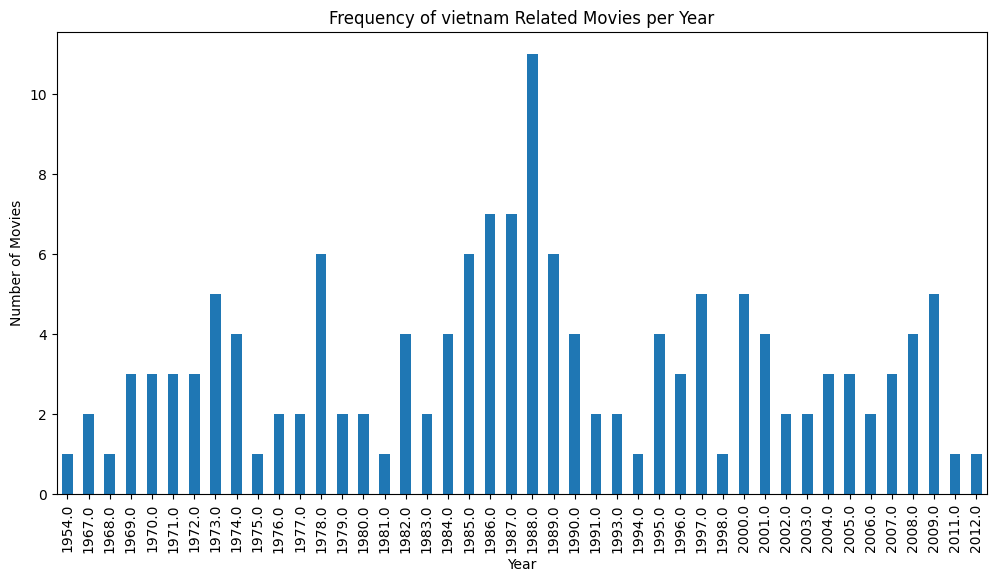

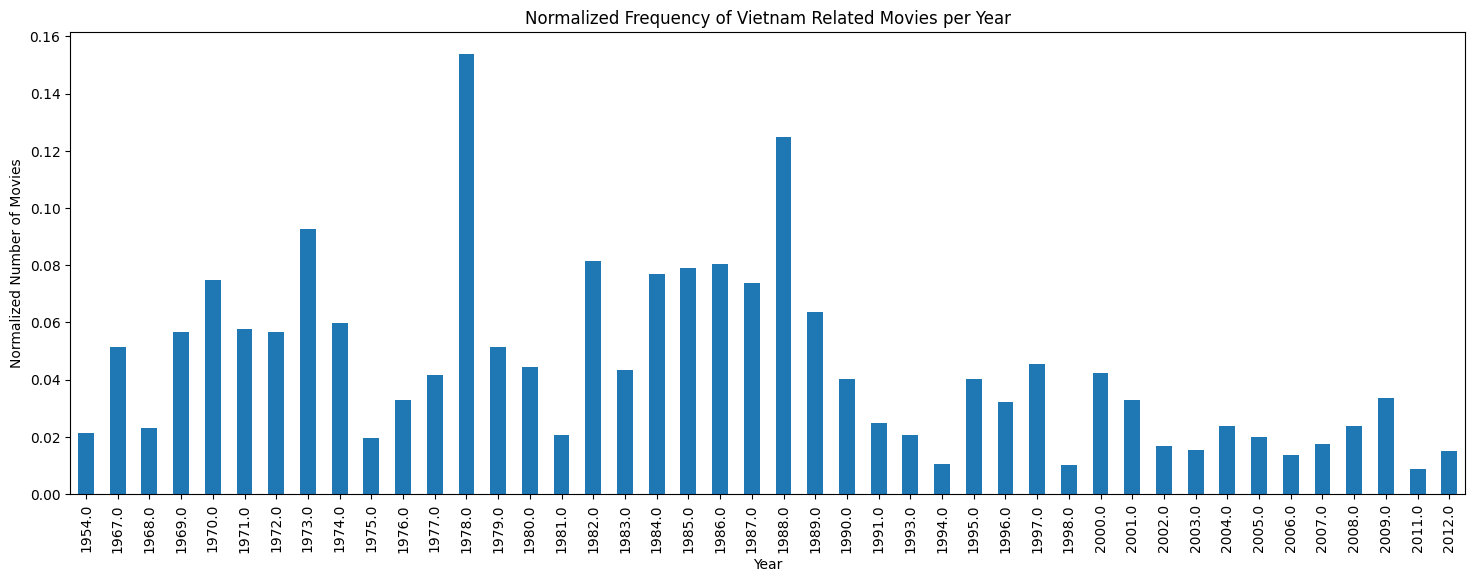

In [28]:
vietnam_related_movies_df['release_date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of vietnam Related Movies per Year')
plt.show()

vietnam_movies_per_year = vietnam_related_movies_df['release_date'].value_counts().sort_index()

normalized_vietnam_movies_per_year = vietnam_movies_per_year / total_movies_per_year

normalized_vietnam_movies_per_year = normalized_vietnam_movies_per_year[normalized_vietnam_movies_per_year> 0]
normalized_vietnam_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Vietnam Related Movies per Year')
plt.show()

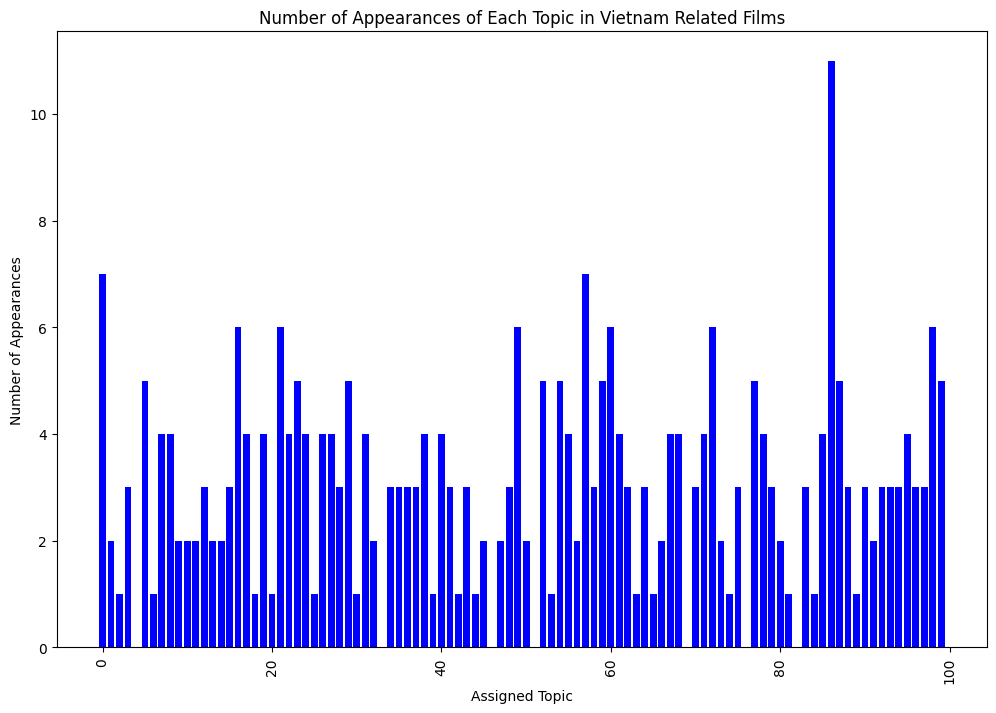

In [29]:
# Filter summaries_war3 to include only the films that are in vietnam_related_movies_df
vietnam_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(vietnam_related_movies_df['name'])]

# Count the number of appearances of each topic in the filtered dataframe
vietnam_topic_counts = vietnam_related_summaries['assigned_topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(vietnam_topic_counts.index, vietnam_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Vietnam Related Films')
plt.xticks(rotation=90)
plt.show()

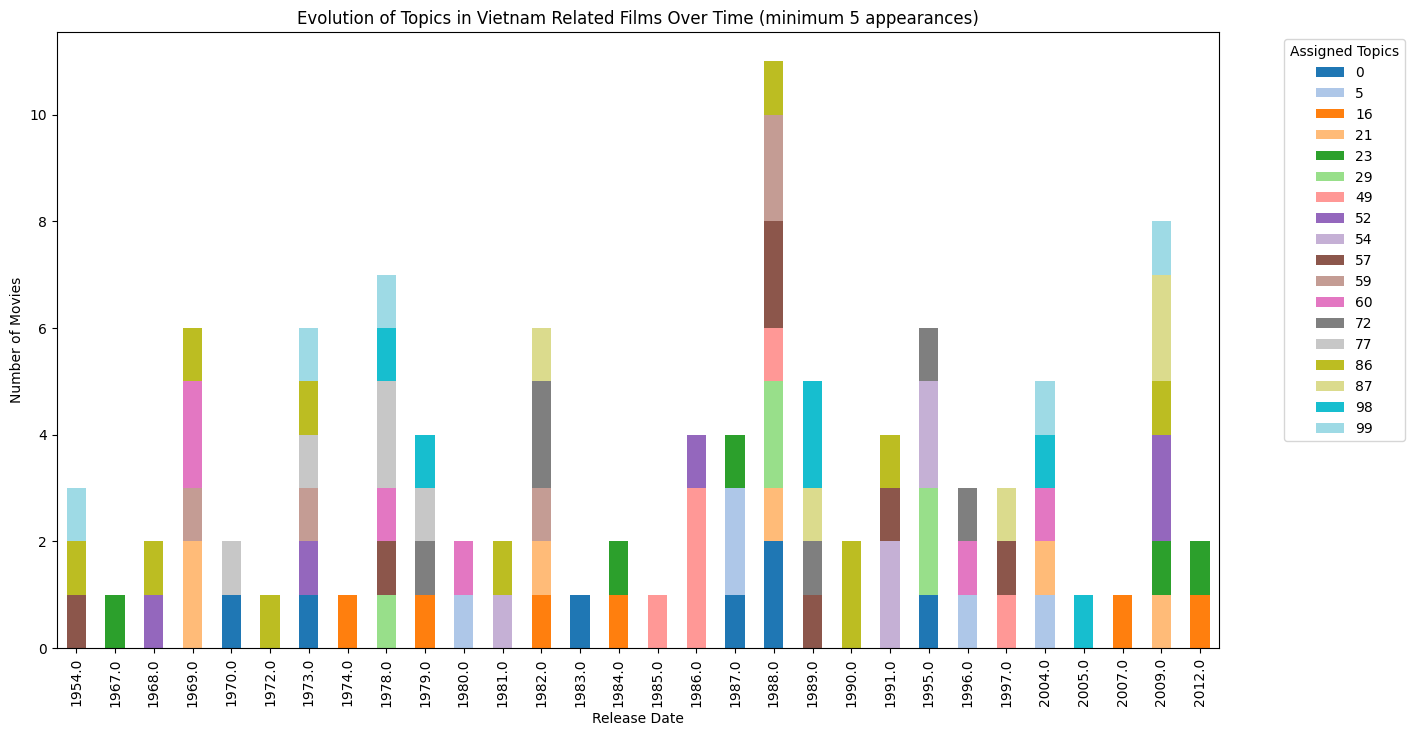

In [31]:
# Set the color palette to a more diverse one
sns.set_palette("tab20")

# Filter topics that appear at least 3 times
filtered_topics = vietnam_topic_counts[vietnam_topic_counts >= 5].index

# Create a pivot table to aggregate the data by release date and assigned topic
filtered_topic_evolution = vietnam_related_summaries[vietnam_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

# Plot the evolution of topics over time as a stacked bar plot
filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Vietnam Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()